In [17]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<h2>Exploring and cleaning the training data </h2>

<AxesSubplot:>

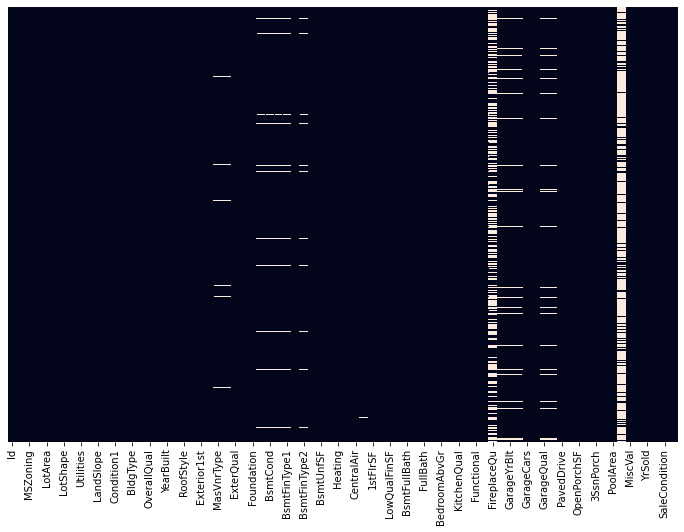

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(train.isnull(),cbar=False,yticklabels=False)

In [7]:
train['FireplaceQu'].count()

770

In [8]:
train['PoolArea'].count()

1460

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

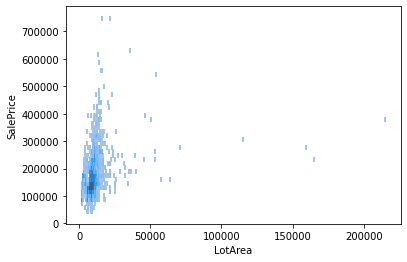

In [9]:
sns.histplot(x='LotArea',y='SalePrice',data=train)

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

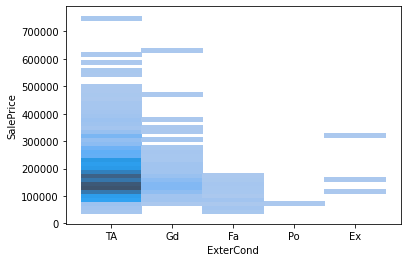

In [10]:
sns.histplot(x='ExterCond',y='SalePrice',data=train)

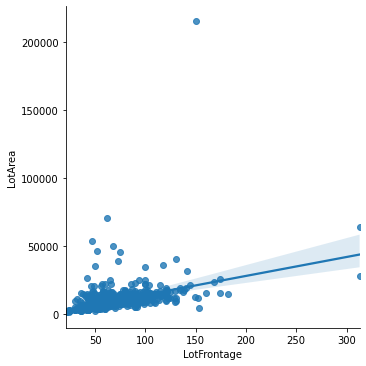

In [11]:
sns.lmplot(x='LotFrontage',y='LotArea',data=train)

In [12]:
train['MiscVal'].count()

1460

In [13]:
def impute_Lot(cols):
    if pd.isnull(cols):
        return train['LotFrontage'].mean()
    return cols
    

In [14]:
train['LotFrontage'] = train['LotFrontage'].apply(impute_Lot)

In [15]:
train.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

In [40]:
L=[]
for i in train.columns:
    if type(train[i].iloc[0])==type(train['SalePrice'].iloc[0]):
        print(i+'\t',train['SalePrice'].corr(train[i]))

Id	 -0.021916719443431106
MSSubClass	 -0.08428413512659517
LotArea	 0.2638433538714057
OverallQual	 0.7909816005838053
OverallCond	 -0.07785589404867799
YearBuilt	 0.5228973328794968
YearRemodAdd	 0.5071009671113862
BsmtFinSF1	 0.3864198062421531
BsmtFinSF2	 -0.011378121450215137
BsmtUnfSF	 0.2144791055469689
TotalBsmtSF	 0.6135805515591956
1stFlrSF	 0.6058521846919145
2ndFlrSF	 0.3193338028320677
LowQualFinSF	 -0.025606130000679548
GrLivArea	 0.7086244776126521
BsmtFullBath	 0.22712223313149438
BsmtHalfBath	 -0.016844154297359012
FullBath	 0.5606637627484456
HalfBath	 0.2841076755947825
BedroomAbvGr	 0.16821315430074
KitchenAbvGr	 -0.1359073708421411
TotRmsAbvGrd	 0.5337231555820281
Fireplaces	 0.46692883675152796
GarageCars	 0.6404091972583522
GarageArea	 0.6234314389183617
WoodDeckSF	 0.3244134445681296
OpenPorchSF	 0.3158562271160552
EnclosedPorch	 -0.1285779579259566
3SsnPorch	 0.04458366533574843
ScreenPorch	 0.11144657114291115
PoolArea	 0.09240354949187314
MiscVal	 -0.021189579

In [41]:
for i in train.columns:
    if type(train[i].iloc[0])==type(train['SalePrice'].iloc[0]):
        L.append(i)

In [46]:
L.pop(0)

'Id'

In [49]:
X=train[L]
Y=train['SalePrice']

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [53]:
scaler.fit(X)

StandardScaler()

In [54]:
scaled_features = scaler.transform(X)

In [56]:
X1 = pd.DataFrame(scaled_features,columns=L)

In [145]:
X1.drop(['MSSubClass','YearBuilt','YrSold'],axis=1,inplace=True)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rfr = RandomForestRegressor(n_estimators=200)

In [62]:
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [63]:
pred = rfr.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error as mse

In [67]:
print(np.sqrt(mse(pred,y_test)))

31475.332677528306


In [146]:
rfr.fit(X1,Y)

RandomForestRegressor(n_estimators=200)

<h2> Test data </h2>

In [69]:
test = pd.read_csv("test.csv")

In [70]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

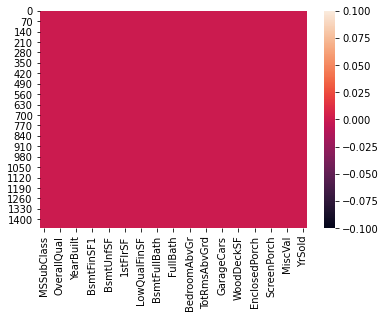

In [128]:
sns.heatmap(test[L].isnull())

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [90]:
null_cols = test[L].columns[train[L].isnull().any()]

In [124]:
test[L].isnull().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [127]:
test[test["TotalBsmtSF"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [106]:
test.loc[1116,'GarageCars']=test['GarageCars'].mean()

In [107]:
test.loc[1116,'GarageArea']=test['GarageArea'].mean()

In [109]:
test.loc[660,'BsmtFullBath']=test['BsmtFullBath'].mean()

In [110]:
test.loc[728,'BsmtFullBath']=test['BsmtFullBath'].mean()

In [112]:
test.loc[660,'BsmtHalfBath']=test['BsmtHalfBath'].mean()

In [113]:
test.loc[728,'BsmtHalfBath']=test['BsmtHalfBath'].mean()

In [115]:
test.loc[660,'BsmtFinSF1']=test['BsmtFinSF1'].mean()

In [117]:
test.loc[660,'BsmtFinSF2']=test['BsmtFinSF2'].mean()

In [123]:
test.loc[660,'BsmtUnfSF']=test['BsmtUnfSF'].mean()

In [121]:
test.loc[660,'TotalBsmtSF']=test['TotalBsmtSF'].mean()

In [129]:
scaler.fit(test[L])

StandardScaler()

In [130]:
scaled_features = scaler.transform(test[L])

In [132]:
X2 = pd.DataFrame(scaled_features,columns=L)

In [147]:
X2.drop(['MSSubClass','YearBuilt','YrSold'],axis=1,inplace=True)

In [148]:
pred2 = rfr.predict(X2)

In [149]:
df = pd.DataFrame()

In [150]:
df['Id']=test['Id']
df['SalePrice']=pred2

In [151]:
df.set_index('Id',inplace=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SalePrice  1459 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [155]:
df.to_csv("submission2.csv")

In [154]:
df

,SalePrice
Id,
1461,131002.120
1462,157601.450
1463,182423.080
1464,180068.500
1465,195672.115
...,...
2915,78727.070
2916,86790.595
2917,167596.385
